# IMPORTS

In [1]:
import sys
sys.path.append('/content/drive/MyDrive/Romanian-Sign-Language-Image-Classification/utils_fn')

In [2]:
from tensorflow import keras
from keras import layers, models, utils, regularizers
import numpy as np
from pathlib import Path
from generate_dataset import *
from plot_history import *
from generate_classification_report import *
from plot_confusion_matrix import *
from predict_image import *

utils.set_random_seed(42)

# CONSTANTS

In [3]:
SAVE_NAME = f'Model with augmentation and dropout and regularization'
DATASET_DIR = Path("/content/drive/MyDrive/Romanian-Sign-Language-Image-Classification/Ro_Sign_language_Dataset")
MODEL_SAVE_DIR = Path("/content/drive/MyDrive/Romanian-Sign-Language-Image-Classification/Saves")

BATCH_SIZE = 64
IMAGE_SIZE = (128, 128)
EPOCHS = 50

# PREPROCESSING

In [4]:
train_dataset, validation_dataset, test_dataset = generate_dataset(base_dir=DATASET_DIR, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE)

Found 15600 files belonging to 26 classes.
Found 5200 files belonging to 26 classes.
Found 5200 files belonging to 26 classes.


In [ ]:
data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"),
                                      layers.RandomRotation(0.05),
                                      layers.RandomZoom(0.2)])

rescale = layers.Rescaling(1./255)

# 64

## ARCHITECTURE

In [ ]:
inputs = keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = data_augmentation(inputs)
x = rescale(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L2())(x)
outputs = layers.Dense(26, activation="softmax")(x)
aug_drop_reg_64_model = keras.Model(inputs=inputs, outputs=outputs)

aug_drop_reg_64_model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 61, 61, 64)        18496     
                                                           

In [ ]:
aug_drop_reg_64_model.compile(loss="categorical_crossentropy",
                              optimizer="adam",
                              metrics=["accuracy"])

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath = str(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}64.model.keras'),
                                             save_best_only=True,
                                             monitor="val_loss")]

history = aug_drop_reg_64_model.fit(train_dataset,
                       epochs=EPOCHS,
                       validation_data=validation_dataset,
                       callbacks=callbacks)

np.save(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}64.history.npy', history.history)
aug_drop_reg_64_model.save(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}64.model.h5', save_format='h5')

Epoch 1/50
244/244 [==============================] - 33s 123ms/step - loss: 3.2242 - accuracy: 0.0844 - val_loss: 3.2880 - val_accuracy: 0.0763
Epoch 2/50
244/244 [==============================] - 29s 115ms/step - loss: 2.5687 - accuracy: 0.2872 - val_loss: 2.3599 - val_accuracy: 0.3944
Epoch 3/50
244/244 [==============================] - 28s 114ms/step - loss: 1.6864 - accuracy: 0.5726 - val_loss: 1.6697 - val_accuracy: 0.5983
Epoch 4/50
244/244 [==============================] - 29s 115ms/step - loss: 1.2915 - accuracy: 0.6994 - val_loss: 1.3030 - val_accuracy: 0.7188
Epoch 5/50
244/244 [==============================] - 29s 116ms/step - loss: 1.0807 - accuracy: 0.7611 - val_loss: 1.1295 - val_accuracy: 0.7521
Epoch 6/50
244/244 [==============================] - 29s 115ms/step - loss: 0.9626 - accuracy: 0.7956 - val_loss: 1.0923 - val_accuracy: 0.7773
Epoch 7/50
244/244 [==============================] - 29s 116ms/step - loss: 0.8451 - accuracy: 0.8278 - val_loss: 1.0661 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


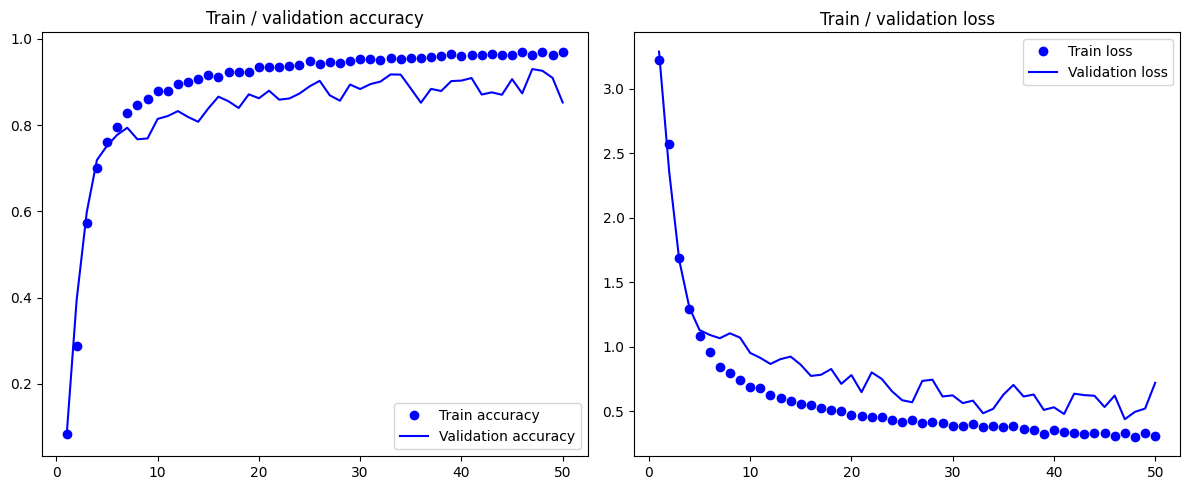

In [5]:
history = np.load(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}64.history.npy', allow_pickle=True).item()

plot_history(history)

## EVALUATION

In [6]:
aug_drop_reg_64_model = keras.models.load_model(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}64.model.keras')
test_loss, test_acc = aug_drop_reg_64_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

82/82 [==============================] - 143s 2s/step - loss: 1.4384 - accuracy: 0.8094
Test accuracy: 0.809


In [7]:
generate_classification_report(aug_drop_reg_64_model, test_dataset)

82/82 [==============================] - 14s 174ms/step
              precision    recall  f1-score   support

           A       0.67      0.95      0.78       200
          Â       0.98      0.98      0.98       200
          Ă       1.00      1.00      1.00       200
           B       0.91      0.95      0.93       200
           C       0.96      1.00      0.98       200
           D       0.93      0.60      0.73       200
           E       0.84      0.94      0.88       200
           F       0.83      0.81      0.82       200
           G       1.00      0.69      0.82       200
           H       0.76      0.98      0.86       200
           I       0.93      0.93      0.93       200
           K       0.97      0.74      0.84       200
           L       0.89      0.95      0.92       200
           M       0.51      0.95      0.66       200
           N       1.00      0.01      0.01       200
           O       0.65      1.00      0.79       200
           P       0.97  

82/82 [==============================] - 15s 187ms/step


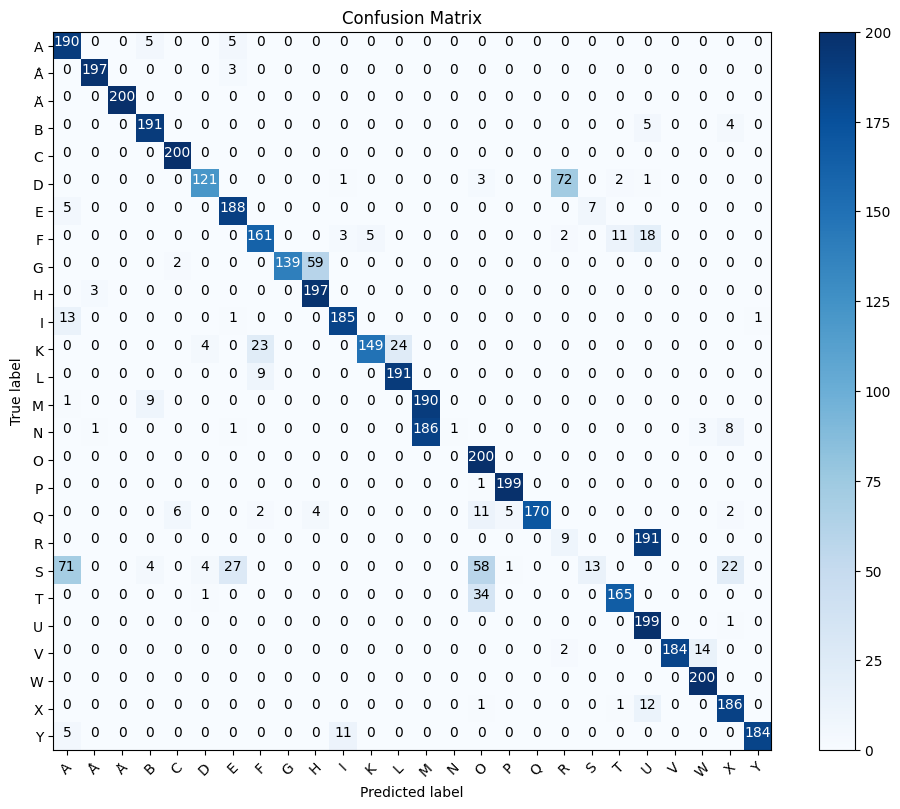

In [8]:
plot_confusion_matrix(aug_drop_reg_64_model, test_dataset)

# 128

## ARCHITECTURE

In [ ]:
inputs = keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = data_augmentation(inputs)
x = rescale(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.L2())(x)
outputs = layers.Dense(26, activation="softmax")(x)
aug_drop_reg_128_model = keras.Model(inputs=inputs, outputs=outputs)

aug_drop_reg_128_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 61, 61, 64)        18496     
                                                           

In [ ]:
aug_drop_reg_128_model.compile(loss="categorical_crossentropy",
                               optimizer="adam",
                               metrics=["accuracy"])

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath = str(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}128.model.keras'),
                                             save_best_only=True,
                                             monitor="val_loss")]

history = aug_drop_reg_128_model.fit(train_dataset,
                       epochs=EPOCHS,
                       validation_data=validation_dataset,
                       callbacks=callbacks)

np.save(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}128.history.npy', history.history)
aug_drop_reg_128_model.save(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}128.model.h5', save_format='h5')

Epoch 1/50
122/122 [==============================] - 34s 251ms/step - loss: 3.3472 - accuracy: 0.0978 - val_loss: 3.4229 - val_accuracy: 0.1027
Epoch 2/50
122/122 [==============================] - 29s 224ms/step - loss: 2.6564 - accuracy: 0.3030 - val_loss: 2.5474 - val_accuracy: 0.3938
Epoch 3/50
122/122 [==============================] - 29s 224ms/step - loss: 1.8224 - accuracy: 0.5954 - val_loss: 1.9216 - val_accuracy: 0.6213
Epoch 4/50
122/122 [==============================] - 29s 226ms/step - loss: 1.3940 - accuracy: 0.7279 - val_loss: 1.3346 - val_accuracy: 0.7567
Epoch 5/50
122/122 [==============================] - 29s 230ms/step - loss: 1.1321 - accuracy: 0.8002 - val_loss: 1.0893 - val_accuracy: 0.8121
Epoch 6/50
122/122 [==============================] - 29s 224ms/step - loss: 0.9898 - accuracy: 0.8393 - val_loss: 1.0695 - val_accuracy: 0.8094
Epoch 7/50
122/122 [==============================] - 29s 225ms/step - loss: 0.9258 - accuracy: 0.8554 - val_loss: 1.1750 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


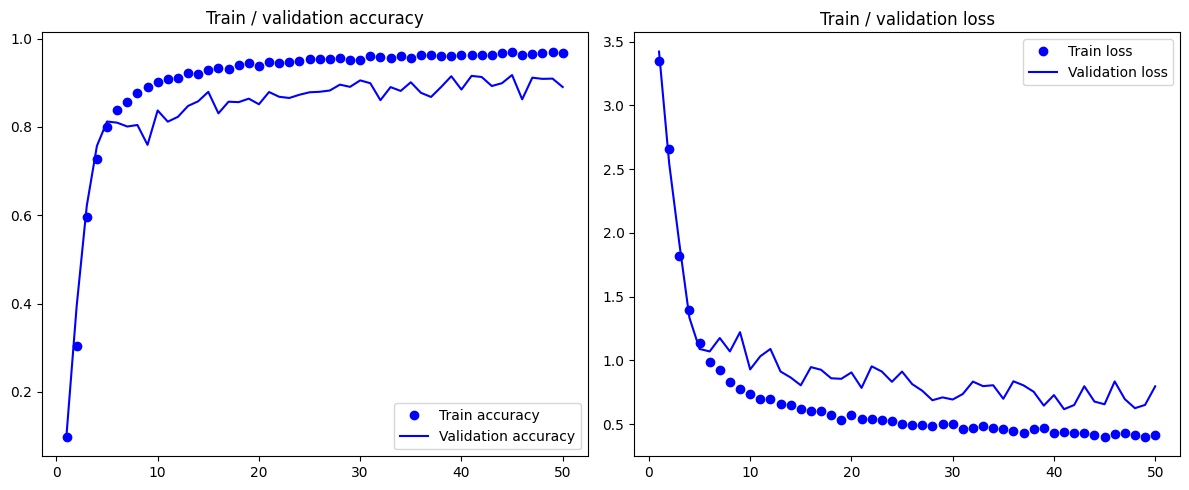

In [9]:
history = np.load(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}128.history.npy', allow_pickle=True).item()

plot_history(history)

## EVALUATION

In [10]:
aug_drop_reg_128_model = keras.models.load_model(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}128.model.keras')
test_loss, test_acc = aug_drop_reg_128_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

82/82 [==============================] - 15s 177ms/step - loss: 1.2623 - accuracy: 0.8421
Test accuracy: 0.842


In [11]:
generate_classification_report(aug_drop_reg_128_model, test_dataset)

82/82 [==============================] - 15s 179ms/step
              precision    recall  f1-score   support

           A       0.49      1.00      0.65       200
          Â       0.96      0.98      0.97       200
          Ă       0.99      0.92      0.95       200
           B       0.99      0.93      0.96       200
           C       0.88      1.00      0.93       200
           D       0.86      0.97      0.92       200
           E       1.00      0.63      0.77       200
           F       0.81      0.83      0.82       200
           G       0.99      0.79      0.88       200
           H       0.85      0.91      0.88       200
           I       0.94      0.86      0.90       200
           K       0.91      0.69      0.79       200
           L       0.82      0.97      0.89       200
           M       0.53      1.00      0.69       200
           N       0.95      0.10      0.19       200
           O       0.80      1.00      0.89       200
           P       0.90  

82/82 [==============================] - 14s 175ms/step


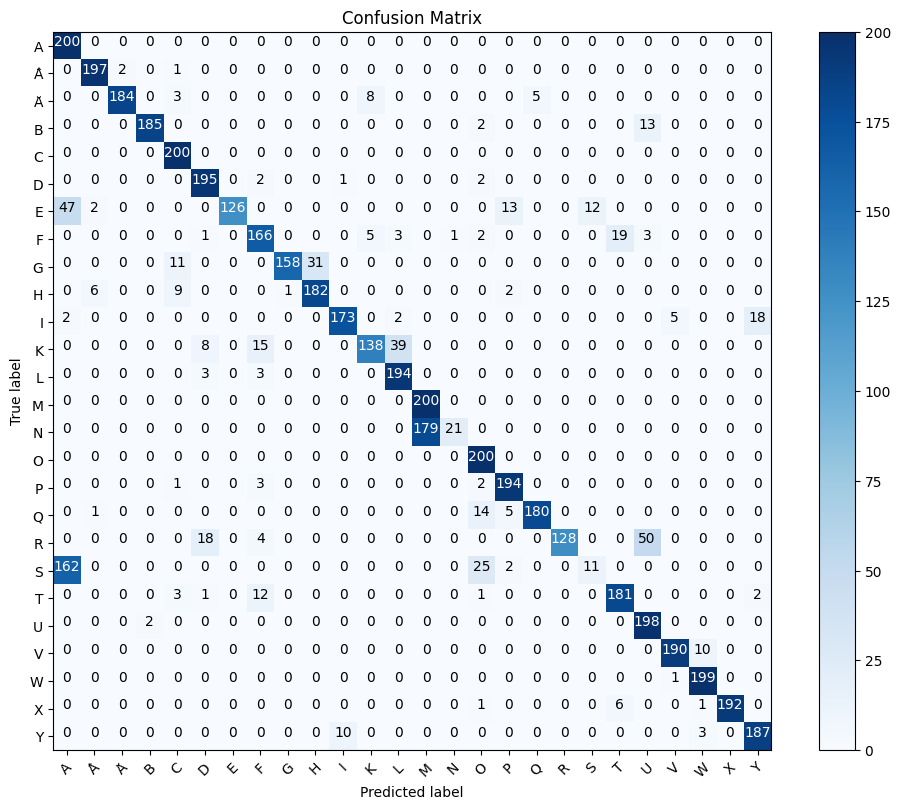

In [12]:
plot_confusion_matrix(aug_drop_reg_128_model, test_dataset)

# 256

## ARCHITECTURE

In [ ]:
inputs = keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = data_augmentation(inputs)
x = rescale(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.L2())(x)
outputs = layers.Dense(26, activation="softmax")(x)
aug_drop_reg_256_model = keras.Model(inputs=inputs, outputs=outputs)

aug_drop_reg_256_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                             

In [ ]:
aug_drop_reg_256_model.compile(loss="categorical_crossentropy",
                               optimizer="adam",
                               metrics=["accuracy"])

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath = str(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}256.model.keras'),
                                             save_best_only=True,
                                             monitor="val_loss")]

history = aug_drop_reg_256_model.fit(train_dataset,
                       epochs=EPOCHS,
                       validation_data=validation_dataset,
                       callbacks=callbacks)

np.save(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}256.history.npy', history.history)
aug_drop_reg_256_model.save(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}256.model.h5', save_format='h5')

Epoch 1/50
244/244 [==============================] - 36s 124ms/step - loss: 3.3594 - accuracy: 0.1138 - val_loss: 3.2299 - val_accuracy: 0.1865
Epoch 2/50
244/244 [==============================] - 29s 115ms/step - loss: 2.2344 - accuracy: 0.4888 - val_loss: 1.9044 - val_accuracy: 0.6060
Epoch 3/50
244/244 [==============================] - 28s 113ms/step - loss: 1.4882 - accuracy: 0.7217 - val_loss: 1.5396 - val_accuracy: 0.7054
Epoch 4/50
244/244 [==============================] - 29s 115ms/step - loss: 1.2217 - accuracy: 0.7917 - val_loss: 1.2801 - val_accuracy: 0.7673
Epoch 5/50
244/244 [==============================] - 29s 115ms/step - loss: 1.0738 - accuracy: 0.8228 - val_loss: 1.1265 - val_accuracy: 0.8173
Epoch 6/50
244/244 [==============================] - 28s 113ms/step - loss: 0.9764 - accuracy: 0.8540 - val_loss: 1.0608 - val_accuracy: 0.8277
Epoch 7/50
244/244 [==============================] - 28s 113ms/step - loss: 0.9190 - accuracy: 0.8699 - val_loss: 0.9975 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


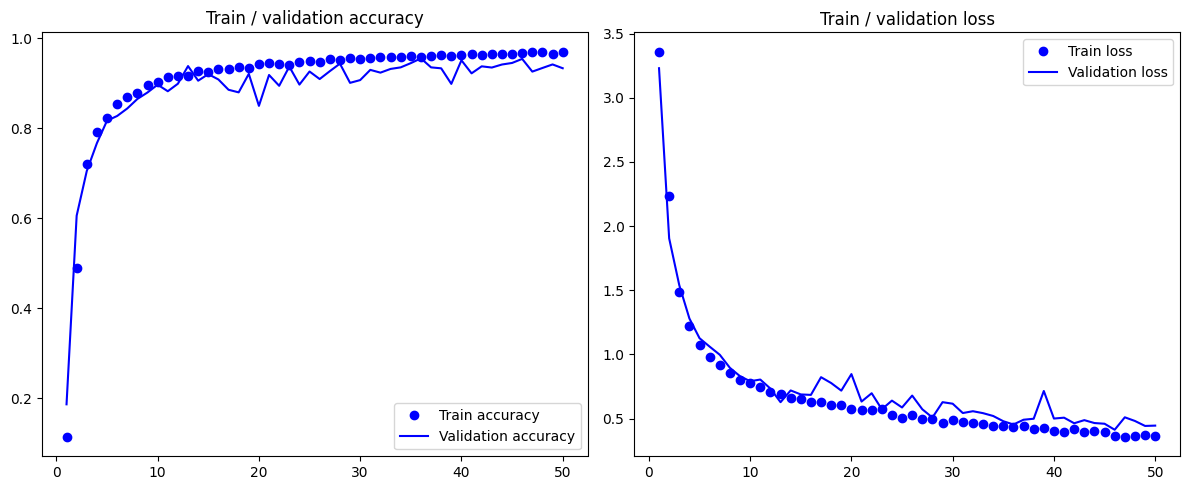

In [13]:
history = np.load(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}256.history.npy', allow_pickle=True).item()

plot_history(history)

## EVALUATION

In [15]:
aug_drop_reg_256_model = keras.models.load_model(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}256.model.keras')
test_loss, test_acc = aug_drop_reg_256_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

82/82 [==============================] - 15s 177ms/step - loss: 1.2513 - accuracy: 0.8346
Test accuracy: 0.835


In [17]:
generate_classification_report(aug_drop_reg_256_model, test_dataset)

82/82 [==============================] - 14s 167ms/step
              precision    recall  f1-score   support

           A       0.66      0.97      0.79       200
          Â       0.93      1.00      0.96       200
          Ă       0.99      0.97      0.98       200
           B       0.88      0.93      0.91       200
           C       0.95      1.00      0.97       200
           D       0.78      0.98      0.87       200
           E       0.93      0.96      0.95       200
           F       0.99      0.74      0.85       200
           G       0.99      0.99      0.99       200
           H       0.99      0.92      0.95       200
           I       0.99      0.93      0.96       200
           K       0.95      0.49      0.65       200
           L       0.64      1.00      0.78       200
           M       0.49      0.97      0.65       200
           N       0.00      0.00      0.00       200
           O       0.64      1.00      0.78       200
           P       0.99  

82/82 [==============================] - 14s 170ms/step


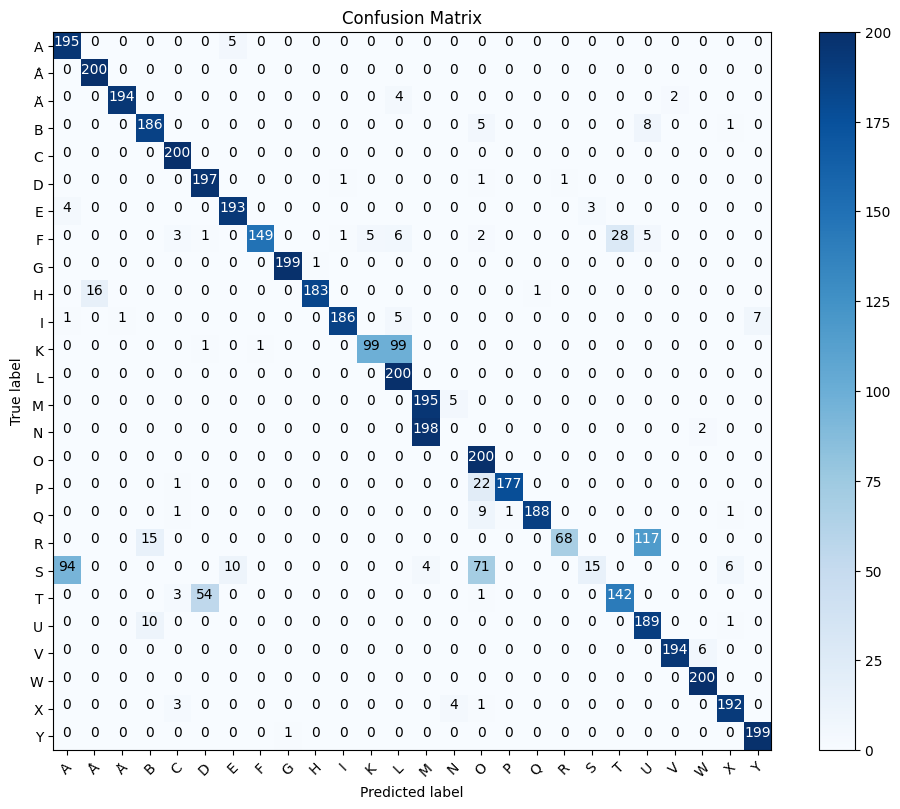

In [19]:
plot_confusion_matrix(aug_drop_reg_256_model, test_dataset)

# 512

## ARCHITECTURE

In [ ]:
inputs = keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = data_augmentation(inputs)
x = rescale(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.L2())(x)
outputs = layers.Dense(26, activation="softmax")(x)
aug_drop_reg_512_model = keras.Model(inputs=inputs, outputs=outputs)

aug_drop_reg_512_model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 61, 61, 64)        18496     
                                                          

In [ ]:
aug_drop_reg_512_model.compile(loss="categorical_crossentropy",
                               optimizer="adam",
                               metrics=["accuracy"])

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath = str(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}512.model.keras'),
                                             save_best_only=True,
                                             monitor="val_loss")]

history = aug_drop_reg_512_model.fit(train_dataset,
                       epochs=EPOCHS,
                       validation_data=validation_dataset,
                       callbacks=callbacks)

np.save(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}512.history.npy', history.history)
aug_drop_reg_512_model.save(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}512.model.h5', save_format='h5')

Epoch 1/50
244/244 [==============================] - 32s 119ms/step - loss: 3.5516 - accuracy: 0.0777 - val_loss: 3.4127 - val_accuracy: 0.0404
Epoch 2/50
244/244 [==============================] - 29s 117ms/step - loss: 2.8044 - accuracy: 0.2583 - val_loss: 2.6597 - val_accuracy: 0.3106
Epoch 3/50
244/244 [==============================] - 30s 117ms/step - loss: 1.9526 - accuracy: 0.5546 - val_loss: 2.0233 - val_accuracy: 0.5410
Epoch 4/50
244/244 [==============================] - 29s 116ms/step - loss: 1.5261 - accuracy: 0.6858 - val_loss: 1.7281 - val_accuracy: 0.6306
Epoch 5/50
244/244 [==============================] - 29s 118ms/step - loss: 1.3320 - accuracy: 0.7510 - val_loss: 1.6454 - val_accuracy: 0.6588
Epoch 6/50
244/244 [==============================] - 29s 117ms/step - loss: 1.2069 - accuracy: 0.7876 - val_loss: 1.7550 - val_accuracy: 0.6500
Epoch 7/50
244/244 [==============================] - 29s 117ms/step - loss: 1.0892 - accuracy: 0.8234 - val_loss: 1.5530 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


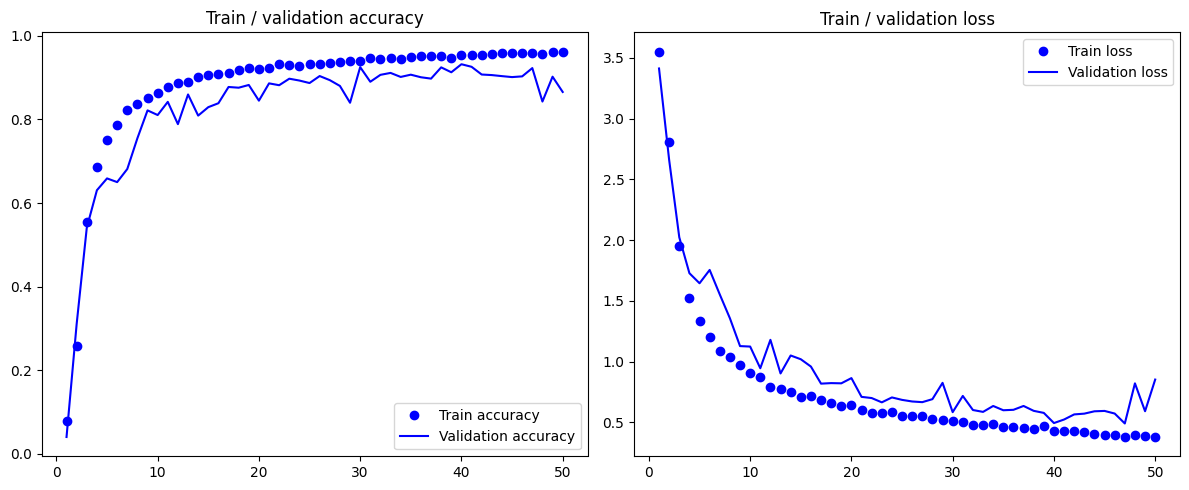

In [21]:
history = np.load(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}512.history.npy', allow_pickle=True).item()

plot_history(history)

## EVALUATION

In [6]:
aug_drop_reg_512_model = keras.models.load_model(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}512.model.keras')
test_loss, test_acc = aug_drop_reg_512_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

82/82 [==============================] - 136s 2s/step - loss: 1.4098 - accuracy: 0.8160
Test accuracy: 0.816


In [23]:
generate_classification_report(aug_drop_reg_512_model, test_dataset)

82/82 [==============================] - 14s 173ms/step
              precision    recall  f1-score   support

           A       0.44      0.99      0.61       200
          Â       0.90      0.98      0.94       200
          Ă       0.95      0.95      0.95       200
           B       0.95      0.83      0.89       200
           C       0.87      1.00      0.93       200
           D       0.84      0.97      0.90       200
           E       0.98      0.71      0.83       200
           F       0.83      0.86      0.85       200
           G       0.92      0.98      0.95       200
           H       0.92      0.95      0.93       200
           I       0.93      0.88      0.90       200
           K       0.96      0.73      0.83       200
           L       0.86      0.92      0.89       200
           M       0.54      0.97      0.70       200
           N       0.83      0.07      0.14       200
           O       0.70      1.00      0.82       200
           P       0.79  

82/82 [==============================] - 17s 200ms/step


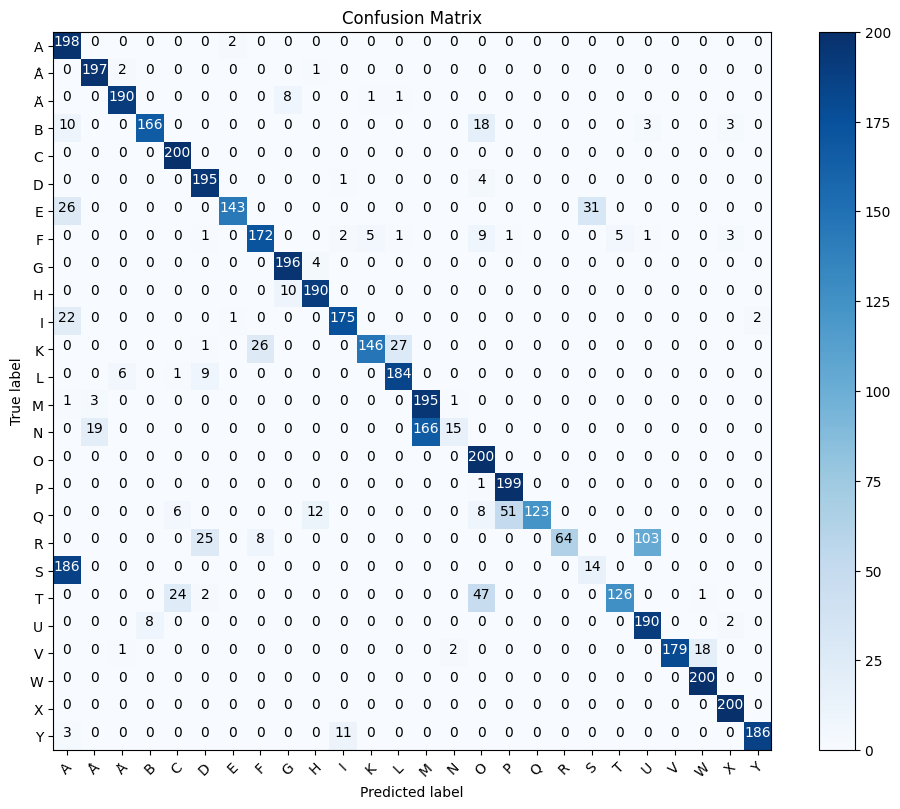

In [7]:
plot_confusion_matrix(aug_drop_reg_512_model, test_dataset)